### Prepare the Dataset

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [ ]:
import pandas as pd
train_df=pd.read_csv('/content/gdrive/MyDrive/CIS522/Data/train.csv')
train_label=pd.read_csv('/content/gdrive/MyDrive/CIS522/Data/train_labels.csv')

In [ ]:
test_df=pd.read_csv('/content/gdrive/MyDrive/CIS522/Data/test.csv').drop(columns=['session_level'])

In [ ]:
train_label

,session_id,correct
0,20090312431273200_q1,1
1,20090312433251036_q1,0
2,20090314121766812_q1,1
3,20090314363702160_q1,1
4,20090314441803444_q1,1
...,...,...
212017,22100215342220508_q18,1
212018,22100215460321130_q18,1
212019,22100217104993650_q18,1
212020,22100219442786200_q18,1


In [ ]:
train_df

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,NaN,NaN,NaN,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,NaN,NaN,NaN,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13174206,22100221145014656,1600,5483231,navigate_click,undefined,22,NaN,343.887291,36.701026,483.0,273.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,NaN,NaN,NaN,13-22
13174207,22100221145014656,1601,5485166,navigate_click,undefined,22,NaN,332.696070,141.493178,545.0,221.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,NaN,NaN,NaN,13-22
13174208,22100221145014656,1602,5485917,navigate_click,undefined,22,NaN,369.912859,140.569205,611.0,217.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,NaN,NaN,NaN,13-22
13174209,22100221145014656,1603,5486753,navigate_click,undefined,22,NaN,252.299653,123.805889,526.0,232.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,NaN,NaN,NaN,13-22


In [ ]:
len(set(train_df['session_id'].to_list()))

11779

### EDA

We check and preprocess the data for modeling in this part. We build the following features.

#### Deal with NULLs

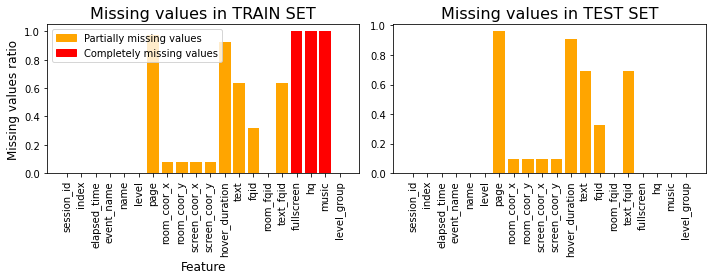

In [ ]:
train_missing_ratios = train_df.isna().sum() / len(train_df)
test_missing_ratios = test_df.isna().sum() / len(test_df)

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.bar(train_missing_ratios.index, train_missing_ratios.values,
        color=['red' if ratio == 1 else 'orange' for ratio in train_missing_ratios.values])
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Missing values ratio', fontsize=12)
plt.title('Missing values in TRAIN SET', fontsize=16)
plt.xticks(rotation=90)
plt.legend(handles=[mpatches.Patch(color='orange'),
                    mpatches.Patch(color='red')], 
           labels=['Partially missing values', 'Completely missing values'])
plt.subplot(1, 2, 2)
plt.bar(test_missing_ratios.index,
        test_missing_ratios.values,
        color=['red' if ratio == 1 else 'orange' for ratio in test_missing_ratios.values])
plt.title('Missing values in TEST SET', fontsize=16)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
def desp(df):
  descrip = [['Col name', 'Data Type', '#Missing Value', 'Missing Percentage', '#Unique']]
  for col in df.columns:
    descrip.append([col, str(df[col].dtypes), sum(df[col].isnull()), round(sum(df[col].isnull())/len(df[col].to_list()),2)*100, len(df[col].unique())])
  return descrip
for i in desp(train_df):
  print("%22s,%18s,%18s,%18s,%18s" % tuple(i))

              Col name,         Data Type,    #Missing Value,Missing Percentage,           #Unique
            session_id,             int64,                 0,               0.0,             11779
                 index,             int64,                 0,               0.0,             20348
          elapsed_time,             int64,                 0,               0.0,           3804019
            event_name,            object,                 0,               0.0,                11
                  name,            object,                 0,               0.0,                 6
                 level,             int64,                 0,               0.0,                23
                  page,           float64,          12889465,              98.0,                 8
           room_coor_x,           float64,           1036240,               8.0,           9120275
           room_coor_y,           float64,           1036240,               8.0,           7047317
         s

In [ ]:
for i in desp(test_df):
  print("%22s,%18s,%18s,%18s,%18s" % tuple(i))

              Col name,         Data Type,    #Missing Value,Missing Percentage,           #Unique
            session_id,             int64,                 0,               0.0,                 3
                 index,             int64,                 0,               0.0,              1564
          elapsed_time,             int64,                 0,               0.0,              3720
            event_name,            object,                 0,               0.0,                11
                  name,            object,                 0,               0.0,                 6
                 level,             int64,                 0,               0.0,                23
                  page,           float64,              3575,              96.0,                 8
           room_coor_x,           float64,               362,              10.0,              3147
           room_coor_y,           float64,               362,              10.0,              2669
         s

From the summary above, we noticed that column `fullscreen`, `hq`, `music` only contain one unique value no matter in `train_df` or in `test_df`, which we cannot make use of. Thus we drop these three columns.

In [ ]:
train_df=train_df.drop(columns=['fullscreen','hq','music'])
test_df=test_df.drop(columns=['fullscreen','hq','music'])

We also notice that, column `page`, `hover_duration`, `text`,`text_fqid` have more than 50% nulls. We also delete it since it will be of little use.

In [ ]:
train_df=train_df.drop(columns=['page','hover_duration','text','text_fqid'])
test_df=test_df.drop(columns=['page','hover_duration','text','text_fqid'])

#### Data Hypothesis

We made several assumptions to the dataset, for instance:
1. we can distinguish end of session through `index` column; [NO]
2. the larger the index, the more `elapsed_time` spent on the session; [YES]
3. the better knowledge a player has, the less `elapsed_time` he/she use; [YES]
4. those who answered correctly might has different `event_name` or `name` distribution to those who answered incorrectly; [YES]
5. `room_coor_x` and `room_coor_y` are helpful features; 

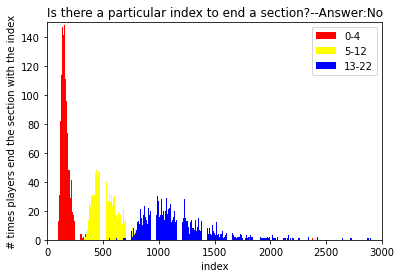

In [ ]:
#@title We can not tell whether a session ends or not via index
#@markdown The distribution of end-session index
max_index_1=train_df[train_df['level_group']=='0-4'][['session_id','index']].groupby('session_id').max().reset_index()
pattern_1 = Counter(max_index_1['index'].to_list())
max_index_2=train_df[train_df['level_group']=='5-12'][['session_id','index']].groupby('session_id').max().reset_index()
pattern_2 = Counter(max_index_2['index'].to_list())
max_index_3=train_df[train_df['level_group']=='13-22'][['session_id','index']].groupby('session_id').max().reset_index()
pattern_3 = Counter(max_index_3['index'].to_list())
plt.bar(pattern_1.keys(),pattern_1.values(),label='0-4',color='red')
plt.bar(pattern_2.keys(),pattern_2.values(),label='5-12',color='yellow')
plt.bar(pattern_3.keys(),pattern_3.values(),label='13-22',color='blue')
plt.ylim([0,150])
plt.xlim([0,3000])
plt.title('Is there a particular index to end a section?--Answer:No')
plt.xlabel('index')
plt.ylabel('# times players end the section with the index')
plt.legend()
plt.show()

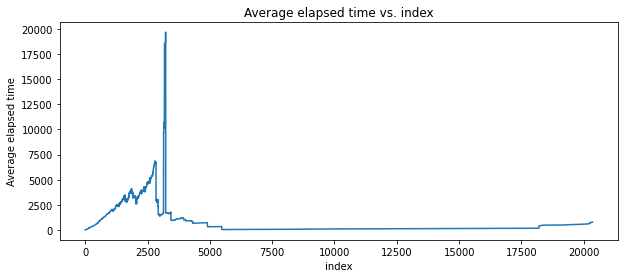

In [ ]:
#@title Drop instance if it has bad elapsed time
#@markdown As we can tell from the previous figure that a session normally ends as index grows to 3000.

#@markdown Therefore, a downward trend is observed around index-3200, since few player has data as index goes to 3000, then the average is low.

#@markdown It was demonstrate by the graph that there is a peak around the value 3200 after a downward trend(many session ends), it might be the case that players leave for a while during the game, in which way, elapsed time can not reflect a player's performance at the peak.

#@markdown We need to drop rows if elapsed_time reaches a high value.
plt.figure(figsize=(10,4))
elapse_1=train_df[['index','elapsed_time']].groupby('index').mean().reset_index()/60/60
plt.plot(elapse_1['elapsed_time'])
plt.title('Average elapsed time vs. index')
plt.xlabel('index')
plt.ylabel('Average elapsed time-hour')
plt.show()

In [ ]:
#@title Get correct_df and incorrect_df to get more insight into features.
# get correct and incorrect columns
train_df['level_str']=train_df['level'].apply(lambda x:str(x+1))
train_df['session_id_str']=train_df['session_id'].apply(lambda x:str(x))
train_df['label_id']=train_df['session_id_str']+"_q"+train_df['level_str']
# train_df['correct']=train_df['label_id'].apply(lambda x:train_label[train_label['session_id']==x].iloc[0]['correct'])
train_df=train_df.merge(train_label,how='left',left_on="label_id",right_on='session_id')

correct_df=train_df[train_df['correct']==1]
incorrect_df=train_df[train_df['correct']==0]

In [ ]:
correct_df

,session_id_x,index,elapsed_time,event_name,name,level,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,fqid,room_fqid,level_group,level_str,session_id_str,label_id,session_id_y,correct
0,20090312431273200,0,0,cutscene_click,basic,0,-413.991405,-159.314686,380.0,494.0,intro,tunic.historicalsociety.closet,0-4,1,20090312431273200,20090312431273200_q1,20090312431273200_q1,1.0
1,20090312431273200,1,1323,person_click,basic,0,-413.991405,-159.314686,380.0,494.0,gramps,tunic.historicalsociety.closet,0-4,1,20090312431273200,20090312431273200_q1,20090312431273200_q1,1.0
2,20090312431273200,2,831,person_click,basic,0,-413.991405,-159.314686,380.0,494.0,gramps,tunic.historicalsociety.closet,0-4,1,20090312431273200,20090312431273200_q1,20090312431273200_q1,1.0
3,20090312431273200,3,1147,person_click,basic,0,-413.991405,-159.314686,380.0,494.0,gramps,tunic.historicalsociety.closet,0-4,1,20090312431273200,20090312431273200_q1,20090312431273200_q1,1.0
4,20090312431273200,4,1863,person_click,basic,0,-412.991405,-159.314686,381.0,494.0,gramps,tunic.historicalsociety.closet,0-4,1,20090312431273200,20090312431273200_q1,20090312431273200_q1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13173720,22100221145014656,1114,4700671,person_click,basic,17,-74.902772,109.397907,367.0,252.0,gramps,tunic.historicalsociety.collection_flag,13-22,18,22100221145014656,22100221145014656_q18,22100221145014656_q18,1.0
13173721,22100221145014656,1115,4702092,person_click,basic,17,-74.902720,109.397904,367.0,252.0,gramps,tunic.historicalsociety.collection_flag,13-22,18,22100221145014656,22100221145014656_q18,22100221145014656_q18,1.0
13173722,22100221145014656,1116,4703239,person_click,basic,17,-74.902708,109.397904,367.0,252.0,gramps,tunic.historicalsociety.collection_flag,13-22,18,22100221145014656,22100221145014656_q18,22100221145014656_q18,1.0
13173723,22100221145014656,1117,4705008,person_click,basic,17,-74.902708,109.397904,367.0,252.0,gramps,tunic.historicalsociety.collection_flag,13-22,18,22100221145014656,22100221145014656_q18,22100221145014656_q18,1.0


In [ ]:
incorrect_df

,session_id_x,index,elapsed_time,event_name,name,level,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,fqid,room_fqid,level_group,level_str,session_id_str,label_id,session_id_y,correct
451,20090312431273200,461,491146,navigate_click,undefined,12,-15.274472,-301.244420,349.0,633.0,toentry,tunic.historicalsociety.stacks,5-12,13,20090312431273200,20090312431273200_q13,20090312431273200_q13,0.0
452,20090312431273200,462,493112,navigate_click,undefined,12,855.392951,113.572340,859.0,255.0,tomap,tunic.historicalsociety.entry,5-12,13,20090312431273200,20090312431273200_q13,20090312431273200_q13,0.0
453,20090312431273200,463,493761,navigate_click,undefined,12,917.082569,118.665716,862.0,255.0,tomap,tunic.historicalsociety.entry,5-12,13,20090312431273200,20090312431273200_q13,20090312431273200_q13,0.0
454,20090312431273200,464,494479,navigate_click,undefined,12,928.177094,104.454909,798.0,265.0,tomap,tunic.historicalsociety.entry,5-12,13,20090312431273200,20090312431273200_q13,20090312431273200_q13,0.0
455,20090312431273200,465,495329,map_hover,basic,12,NaN,NaN,NaN,NaN,tunic.capitol_1,tunic.historicalsociety.entry,5-12,13,20090312431273200,20090312431273200_q13,20090312431273200_q13,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13173534,22100221145014656,928,4461823,navigate_click,undefined,15,211.404450,117.589549,436.0,249.0,tostacks,tunic.historicalsociety.entry,13-22,16,22100221145014656,22100221145014656_q16,22100221145014656_q16,0.0
13173535,22100221145014656,929,4462959,navigate_click,undefined,15,-25.000000,125.565455,415.0,187.0,tofrontdesk,tunic.historicalsociety.stacks,13-22,16,22100221145014656,22100221145014656_q16,22100221145014656_q16,0.0
13173536,22100221145014656,930,4463424,navigate_click,undefined,15,-9.900272,126.081197,425.0,188.0,tofrontdesk,tunic.historicalsociety.stacks,13-22,16,22100221145014656,22100221145014656_q16,22100221145014656_q16,0.0
13173537,22100221145014656,931,4465411,navigate_click,undefined,15,-40.211227,-9.000000,381.0,339.0,key,tunic.historicalsociety.frontdesk,13-22,16,22100221145014656,22100221145014656_q16,22100221145014656_q16,0.0


In [ ]:
#@title The better knowledge a player has, the less elapsed time he/she use.
#@markdown As shown below, correct_answer player spent less average time on the game.

#@markdown We show the first 1000 rows, since as there are more data, the average become more and more close after divided by 3600.
plt.figure(figsize=(10,4))
elapse_1=correct_df[['index','elapsed_time']].groupby('index').mean().reset_index().rename(columns={"elapsed_time":"correct_elapsed_time"})
elapse_1['incorrect_elapsed_time']=incorrect_df[['index','elapsed_time']].groupby('index').mean().reset_index().rename(columns={"elapsed_time":"incorrect_elapsed_time"})['incorrect_elapsed_time']
elapse_1['correct_elapsed_time']=elapse_1['correct_elapsed_time']/60/60
elapse_1['incorrect_elapsed_time']=elapse_1['incorrect_elapsed_time']/60/60
elapse_1.head(1000)
# elapse_begin=elapse_1.head(2000)
# elapse_end=elapse_1.tail(10348)
# elapse_1.plot(x='index',y=['correct_elapsed_time','incorrect_elapsed_time'],kind='line')
# def elapse_plot(elapse_1):
#   plt.plot(elapse_1['index'],elapse_1['correct_elapsed_time'],label='correct',color='red')
#   plt.plot(elapse_1['index'],elapse_1['incorrect_elapsed_time'],label='incorrect')
#   plt.title('Average elapsed time vs. index')
#   plt.xlabel('index')
#   plt.ylabel('Average elapsed time-hour')
#   plt.legend()
#   plt.show()
# elapse_plot(elapse_begin)
# elapse_plot(elapse_end)

,index,correct_elapsed_time,incorrect_elapsed_time
0,0,4.914994,5.001359
1,1,9.147455,9.303630
2,2,9.755109,9.916335
3,3,10.156523,10.319639
4,4,10.573030,10.737326
...,...,...,...
995,995,1819.547947,1828.594590
996,996,1818.412772,1827.477867
997,997,1828.914891,1837.735625
998,998,1833.702776,1842.268835


<Figure size 720x288 with 0 Axes>

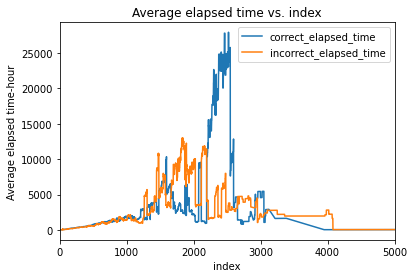

,index,correct_elapsed_time,incorrect_elapsed_time
0,0,1.642743,0.759431
1,1,7.226777,1.691418
2,2,7.828865,2.316603
3,3,8.313023,2.759053
4,4,8.679120,3.310436
...,...,...,...
995,995,1865.599711,1429.445755
996,996,1870.247029,1436.985353
997,997,1867.541681,1455.295550
998,998,1853.622511,1458.111383


In [ ]:
#@title [new]The better knowledge a player has, the less elapsed time he/she use.
#@markdown As shown below, correct_answer player spent less average time on the game.

# @markdown We show the first 1000 rows, since as there are more data, the average become more and more close after divided by 3600.
plt.figure(figsize=(10,4))
elapse_1=correct_df[['index','elapsed_time']].groupby('index').mean().reset_index().rename(columns={"elapsed_time":"correct_elapsed_time"})
elapse_1['incorrect_elapsed_time']=incorrect_df[['index','elapsed_time']].groupby('index').mean().reset_index().rename(columns={"elapsed_time":"incorrect_elapsed_time"})['incorrect_elapsed_time']
elapse_1['correct_elapsed_time']=elapse_1['correct_elapsed_time']/60/60
elapse_1['incorrect_elapsed_time']=elapse_1['incorrect_elapsed_time']/60/60
elapse_1.plot(x='index',y=['correct_elapsed_time','incorrect_elapsed_time'],kind='line')
# def elapse_plot(elapse_1):
#   plt.plot(elapse_1['index'],elapse_1['correct_elapsed_time'],label='correct',color='red')
#   plt.plot(elapse_1['index'],elapse_1['incorrect_elapsed_time'],label='incorrect')
plt.title('Average elapsed time vs. index')
plt.xlabel('index')
plt.xlim([0,5000])
plt.ylabel('Average elapsed time-hour')
plt.legend()
plt.show()
elapse_1.head(1000)

In [ ]:
# correct_df.rename(columns={'session_id_x':'session_id'})
correct_df=correct_df.rename(columns={'session_id_x':'session_id'})
incorrect_df=incorrect_df.rename(columns={'session_id_x':'session_id'})

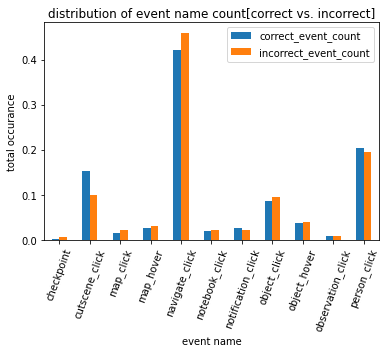

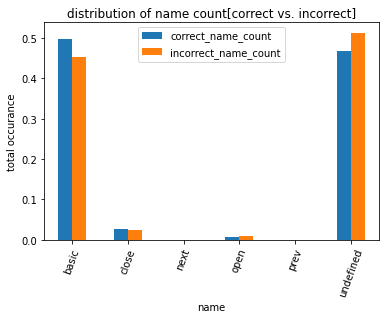

In [ ]:
#@title Correct and incorrect label correspond to different distribution of event names [wrong hypothesis]

c_count=correct_df[['session_id','event_name']].groupby(['event_name']).count().rename(columns={'session_id':'correct_event_count'}).reset_index()
ic_count=incorrect_df[['session_id','event_name']].groupby(['event_name']).count().rename(columns={'session_id':'event_count'}).reset_index()
c_count['incorrect_event_count']=ic_count['event_count']/ic_count['event_count'].sum()
c_count['correct_event_count']=c_count['correct_event_count']/c_count['correct_event_count'].sum()
c_count.plot(x='event_name',y=['correct_event_count','incorrect_event_count'],kind='bar')
plt.xticks(rotation=70)
plt.xlabel('event name')
plt.ylabel('total occurance')
plt.title('distribution of event name count[correct vs. incorrect]')
plt.show()

c_count=correct_df[['session_id','name']].groupby(['name']).count().rename(columns={'session_id':'correct_name_count'}).reset_index()
ic_count=incorrect_df[['session_id','name']].groupby(['name']).count().rename(columns={'session_id':'event_count'}).reset_index()
c_count['incorrect_name_count']=ic_count['event_count']/ic_count['event_count'].sum()
c_count['correct_name_count']=c_count['correct_name_count']/c_count['correct_name_count'].sum()
c_count.plot(x='name',y=['correct_name_count','incorrect_name_count'],kind='bar')
plt.xticks(rotation=70)
plt.xlabel('name')
plt.ylabel('total occurance')
plt.title('distribution of name count[correct vs. incorrect]')
plt.show()

In [ ]:
plt.scatter(correct_df['room_coor_x'][correct_df['level_group']=='0-4'].to_list(),correct_df['room_coor_y'][correct_df['level_group']=='0-4'].to_list())

In [ ]:
plt.scatter(incorrect_df['room_coor_x'][incorrect_df['level_group']=='0-4'].to_list(),incorrect_df['room_coor_y'][incorrect_df['level_group']=='0-4'].to_list())

In [ ]:
correct_df

,session_id,index,elapsed_time,event_name,name,level,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,fqid,room_fqid,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,-413.991405,-159.314686,380.0,494.0,intro,tunic.historicalsociety.closet,0-4
1,20090312431273200,1,1323,person_click,basic,0,-413.991405,-159.314686,380.0,494.0,gramps,tunic.historicalsociety.closet,0-4
2,20090312431273200,2,831,person_click,basic,0,-413.991405,-159.314686,380.0,494.0,gramps,tunic.historicalsociety.closet,0-4
3,20090312431273200,3,1147,person_click,basic,0,-413.991405,-159.314686,380.0,494.0,gramps,tunic.historicalsociety.closet,0-4
4,20090312431273200,4,1863,person_click,basic,0,-412.991405,-159.314686,381.0,494.0,gramps,tunic.historicalsociety.closet,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13174206,22100221145014656,1600,5483231,navigate_click,undefined,22,343.887291,36.701026,483.0,273.0,NaN,tunic.capitol_2.hall,13-22
13174207,22100221145014656,1601,5485166,navigate_click,undefined,22,332.696070,141.493178,545.0,221.0,chap4_finale_c,tunic.capitol_2.hall,13-22
13174208,22100221145014656,1602,5485917,navigate_click,undefined,22,369.912859,140.569205,611.0,217.0,NaN,tunic.capitol_2.hall,13-22
13174209,22100221145014656,1603,5486753,navigate_click,undefined,22,252.299653,123.805889,526.0,232.0,chap4_finale_c,tunic.capitol_2.hall,13-22


In [ ]:
incorrect_df

,session_id,index,elapsed_time,event_name,name,level,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,fqid,room_fqid,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,-413.991405,-159.314686,380.0,494.0,intro,tunic.historicalsociety.closet,0-4
1,20090312431273200,1,1323,person_click,basic,0,-413.991405,-159.314686,380.0,494.0,gramps,tunic.historicalsociety.closet,0-4
2,20090312431273200,2,831,person_click,basic,0,-413.991405,-159.314686,380.0,494.0,gramps,tunic.historicalsociety.closet,0-4
3,20090312431273200,3,1147,person_click,basic,0,-413.991405,-159.314686,380.0,494.0,gramps,tunic.historicalsociety.closet,0-4
4,20090312431273200,4,1863,person_click,basic,0,-412.991405,-159.314686,381.0,494.0,gramps,tunic.historicalsociety.closet,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13174206,22100221145014656,1600,5483231,navigate_click,undefined,22,343.887291,36.701026,483.0,273.0,NaN,tunic.capitol_2.hall,13-22
13174207,22100221145014656,1601,5485166,navigate_click,undefined,22,332.696070,141.493178,545.0,221.0,chap4_finale_c,tunic.capitol_2.hall,13-22
13174208,22100221145014656,1602,5485917,navigate_click,undefined,22,369.912859,140.569205,611.0,217.0,NaN,tunic.capitol_2.hall,13-22
13174209,22100221145014656,1603,5486753,navigate_click,undefined,22,252.299653,123.805889,526.0,232.0,chap4_finale_c,tunic.capitol_2.hall,13-22


In [ ]:
correct_df.columns


Index(['session_id', 'index', 'elapsed_time', 'event_name', 'name', 'level',
       'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'fqid',
       'room_fqid', 'level_group'],
      dtype='object')

In [ ]:
# session_id -- person_id
# index -- timestamp
# elapsed_time -- drop rows is needed
# event_name -- of little use[same distribution on correct and incorrect]
# name -- of little use[same distribution on correct and incorrect]
level
# page -- drop(over 50% nulls)
room_coor_x
room_coor_y
screen_coor_x
screen_coor_y
# hover_duration -- drop(over 50% nulls)
# text -- drop(over 50% nulls)
fqid
room_fqid
# text_fqid -- drop(over 50% nulls)
# fullscreen -- drop
# hq -- drop
# music -- drop
# level_group -- important, cannot drop